In [4]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, '/Users/kseuro/Dropbox/Academics/Research/senior_thesis/particle_generator/')
from ewm import ewm_convG as G

In [17]:
def ewm_kwargs(config):
    '''
        Create a dictionary of key word arguments for a generator model
        that will be trained to replicate a set of code_vector targets

        - 'dataset' key corresponds to the integer size of the
          code_vector dimension.
    '''
    ewm_kwargs = {}
    if config['MNIST']:
        raise Exception("EWM model is not set up to train on MNIST data ... sorry")
    code_size = config['l_dim']
    if config['model'] == 'ewm_conv':
        depth   = [config['depth']] * config['n_layers'] # [32, 32, 32, 32]
        divisor = lambda: [ (yield 2**i) for i in range(config['n_layers']) ]
        depth   = [a//b for a,b in zip(depth, [*divisor()])][::-1] # [4, 8, 16, 32]
        ewm_kwargs.update( { 'l_dim'     : code_size,
                             'dec_sizes' : depth[1:len(depth)][::-1] + [1],
                             'im_size'   : config['dataset'] } )
    else:
        # Creat list of sizes corresponding to the individual
        # fully connected layers in the model
        # e.g. n_hidden = 10, nlayers = 4, fc_sizes = [10,10,10,10]
        fc_sizes = [config['n_hidden']] * config['n_layers']

        ewm_kwargs.update({ 'z_dim'      : config['z_dim'],
                            'fc_sizes'   : fc_sizes,
                            'n_out'      : code_size })
    return ewm_kwargs

In [26]:
config = {'l_dim':6, 'depth':32, 'n_layers':3, 'dataset':64, 'MNIST':False, 'model':'ewm_conv'}

In [27]:
kwargs = ewm_kwargs(config)

In [28]:
kwargs

{'l_dim': 6, 'dec_sizes': [32, 16, 1], 'im_size': 64}

In [29]:
net = G(**kwargs)

In [30]:
net

ewm_convG(
  (main): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(6, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
    )
  )
)

In [47]:
input = torch.randn(384).view(1, 6, 8, 8)

In [48]:
output = net(input)

In [49]:
output.shape

torch.Size([1, 1, 64, 64])

In [50]:
img = output.view(64, 64).detach().numpy()

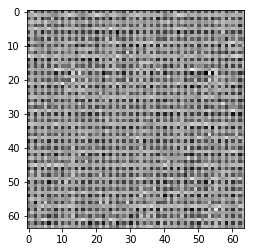

In [52]:
plt.imshow(img, cmap='gray')